# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [241]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

pc_path = "E:\\datasets\\"


## Cargar datos

In [242]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv(pc_path + "megaline_calls.csv")
internet = pd.read_csv(pc_path + "megaline_internet.csv")
messages = pd.read_csv(pc_path + "megaline_messages.csv")
plans = pd.read_csv(pc_path + "megaline_plans.csv")
users = pd.read_csv(pc_path + "megaline_users.csv")


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [243]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [244]:
# Imprime una muestra de los datos para las tarifas
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

- La tabla contiene 2 registros con la información de los planes. No contiene registros duplicados, datos ausentes o datos que le hagan falta arreglo en su formato.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [245]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [246]:
# Imprime una muestra de datos para usuarios
users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
397,1397,Willow,Steele,70,"Oklahoma City, OK MSA",2018-06-01,surf,NaN
476,1476,Tammara,Dorsey,24,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-06-10,ultimate,NaN
294,1294,Demetrius,Russo,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaN
282,1282,Annice,Calhoun,61,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-01,ultimate,NaN
83,1083,Lyndia,Acevedo,65,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-10-26,surf,2018-12-18
347,1347,Trey,Lynch,65,"Charleston-North Charleston, SC MSA",2018-06-17,ultimate,NaN
188,1188,Ethelene,Brock,31,"Richmond, VA MSA",2018-01-10,ultimate,NaN
245,1245,Quinn,David,30,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-19,surf,NaN
107,1107,Lane,Cash,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-15,ultimate,NaN
34,1034,Jc,Gentry,22,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-13,surf,NaN


In [247]:
print('Filas duplicadas:', users.duplicated().sum())
print('User ids duplicados:', users.duplicated('user_id').sum())
print('Valores ausentes: \n', users.isna().sum())

Filas duplicadas: 0
User ids duplicados: 0
Valores ausentes: 
 user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

- La columna de "churn_date" tiene varios valores nulos. Se puede corregir llenándolos con otro valor para evitar problemas con el análisis. Igualmente, las columnas con fechas se deben de cambiar al formato datetime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [248]:
users['churn_date'] = users['churn_date'].fillna(0)

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [249]:
users['reg_date'] = pd.to_datetime(users['reg_date'])

## Llamadas

In [250]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [251]:
# Imprime una muestra de datos para las llamadas
calls.sample(10)

,id,user_id,call_date,duration
111860,1393_34,1393,2018-12-01,2.83
119213,1415_261,1415,2018-12-25,12.80
108391,1382_1712,1382,2018-11-03,12.14
114282,1400_632,1400,2018-12-05,0.00
45505,1164_204,1164,2018-09-15,3.62
56964,1203_355,1203,2018-07-17,8.62
50942,1184_70,1184,2018-12-19,7.85
82896,1299_554,1299,2018-07-08,2.26
82677,1299_335,1299,2018-06-12,0.00
44875,1162_90,1162,2018-12-01,8.63


In [252]:
print('Filas duplicadas:', calls.duplicated().sum())
print('Ids de llamadas que esten duplicadas:', calls.duplicated('id').sum())
print('Valores ausentes: \n', calls.isna().sum())

Filas duplicadas: 0
Ids de llamadas que esten duplicadas: 0
Valores ausentes: 
 id           0
user_id      0
call_date    0
duration     0
dtype: int64


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

- No contiene registros duplicados o datos ausentes. La columna de 'call_date' se debe de cambiar a formato datetime para poder usarlo en el análisis.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [253]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Mensajes

In [254]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [255]:
# Imprime una muestra de datos para los mensajes
messages.sample(10)


,id,user_id,message_date
44394,1295_9,1295,2018-10-24
45305,1304_346,1304,2018-11-26
63741,1405_541,1405,2018-11-14
18933,1123_2,1123,2018-11-14
15899,1105_98,1105,2018-11-08
37364,1247_528,1247,2018-08-02
42992,1281_302,1281,2018-08-23
25698,1155_60,1155,2018-12-06
9586,1069_854,1069,2018-12-24
76019,1497_317,1497,2018-12-17


In [256]:
print('Registros duplicados: ', messages.duplicated().sum())
print('Id de mensajes que esten duplicados: ', messages.duplicated('id').sum())
print('Valores ausentes: \n', messages.isna().sum())

Registros duplicados:  0
Id de mensajes que esten duplicados:  0
Valores ausentes: 
 id              0
user_id         0
message_date    0
dtype: int64


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

- No contiene registros duplicados o datos ausentes. Se sugiere cambiar el formato de la columna 'message_date' a datetime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [257]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Internet

In [258]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [259]:
# Imprime una muestra de datos para el tráfico de internet
internet.sample(10)

,id,user_id,session_date,mb_used
46433,1206_268,1206,2018-12-16,0.00
23332,1106_703,1106,2018-08-20,104.53
73713,1346_295,1346,2018-11-09,667.38
40601,1182_298,1182,2018-10-20,876.85
98560,1466_41,1466,2018-07-28,235.78
21089,1098_120,1098,2018-11-08,1053.90
1103,1007_87,1007,2018-08-19,0.00
77795,1362_485,1362,2018-06-26,53.96
41522,1185_559,1185,2018-08-14,324.49
66023,1305_218,1305,2018-09-08,130.29


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

-  No contiene registros duplicados o datos ausentes. Se sugiere cambiar el formato de la columna 'session_date' a datetime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [260]:
internet['session_date'] = pd.to_datetime(internet['session_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [261]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [262]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls['month'] = calls['call_date'].dt.month
calls_by_user_month = calls.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = 'count').reset_index()
calls_by_user_month.columns = ['user_id', 'month', 'total_calls']

calls_by_user_month.head(10)


,user_id,month,total_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
5,1001,12,56
6,1002,10,11
7,1002,11,55
8,1002,12,47
9,1003,12,149


In [263]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_by_user_month = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = ['sum', 'mean'] ).reset_index()
minutes_by_user_month.columns = ['user_id', 'month', 'total_minutes', 'average_minutes']

minutes_by_user_month.head(10)

,user_id,month,total_minutes,average_minutes
0,1000,12,116.83,7.301875
1,1001,8,171.14,6.338519
2,1001,9,297.69,6.075306
3,1001,10,374.11,5.755538
4,1001,11,404.59,6.321719
5,1001,12,392.93,7.016607
6,1002,10,54.13,4.920909
7,1002,11,359.76,6.541091
8,1002,12,363.24,7.728511
9,1003,12,1041.00,6.986577


In [264]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['month'] = messages['message_date'].dt.month
messages_by_user_month = messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = 'count').reset_index()
messages_by_user_month.columns = ['user_id', 'month', 'total_messages']

messages_by_user_month.head(10)

,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
5,1001,12,44
6,1002,10,15
7,1002,11,32
8,1002,12,41
9,1003,12,50


In [265]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['month'] = internet['session_date'].dt.month
mb_by_user_month = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum').reset_index()
mb_by_user_month.columns = ['user_id', 'month', 'total_mb']

mb_by_user_month.head(10)

,user_id,month,total_mb
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
5,1001,12,19369.18
6,1002,10,6552.01
7,1002,11,19345.08
8,1002,12,14396.24
9,1003,12,27044.14


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [266]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
user_consumption = calls_by_user_month.merge(minutes_by_user_month, on = ['user_id', 'month'], how = 'outer')
user_consumption = user_consumption.merge(messages_by_user_month, on = ['user_id', 'month'], how = 'outer')
user_consumption = user_consumption.merge(mb_by_user_month, on = ['user_id', 'month'], how = 'outer')

In [267]:
# Añade la información de la tarifa
user_consumption = user_consumption.merge(users, on = 'user_id', how = 'left').reset_index()

In [268]:
user_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            2293 non-null   int64         
 1   user_id          2293 non-null   int64         
 2   month            2293 non-null   int32         
 3   total_calls      2258 non-null   float64       
 4   total_minutes    2258 non-null   float64       
 5   average_minutes  2258 non-null   float64       
 6   total_messages   1806 non-null   float64       
 7   total_mb         2277 non-null   float64       
 8   first_name       2293 non-null   object        
 9   last_name        2293 non-null   object        
 10  age              2293 non-null   int64         
 11  city             2293 non-null   object        
 12  reg_date         2293 non-null   datetime64[ns]
 13  plan             2293 non-null   object        
 14  churn_date       2293 non-null   object 

In [269]:
user_consumption.drop(['first_name', 'last_name', 'age', 'reg_date', 'churn_date', 'index'], axis = 1, inplace = True)

In [270]:
user_consumption = user_consumption.fillna(0)
user_consumption[user_consumption['total_mb'].isna()]

,user_id,month,total_calls,total_minutes,average_minutes,total_messages,total_mb,city,plan


In [271]:
user_consumption.head(10)

,user_id,month,total_calls,total_minutes,average_minutes,total_messages,total_mb,city,plan
0,1000,12,16.0,116.83,7.301875,11.0,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,8,27.0,171.14,6.338519,30.0,6919.15,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1001,9,49.0,297.69,6.075306,44.0,13314.82,"Seattle-Tacoma-Bellevue, WA MSA",surf
3,1001,10,65.0,374.11,5.755538,53.0,22330.49,"Seattle-Tacoma-Bellevue, WA MSA",surf
4,1001,11,64.0,404.59,6.321719,36.0,18504.30,"Seattle-Tacoma-Bellevue, WA MSA",surf
5,1001,12,56.0,392.93,7.016607,44.0,19369.18,"Seattle-Tacoma-Bellevue, WA MSA",surf
6,1002,10,11.0,54.13,4.920909,15.0,6552.01,"Las Vegas-Henderson-Paradise, NV MSA",surf
7,1002,11,55.0,359.76,6.541091,32.0,19345.08,"Las Vegas-Henderson-Paradise, NV MSA",surf
8,1002,12,47.0,363.24,7.728511,41.0,14396.24,"Las Vegas-Henderson-Paradise, NV MSA",surf
9,1003,12,149.0,1041.00,6.986577,50.0,27044.14,"Tulsa, OK MSA",surf


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [272]:
# Calcula el ingreso mensual para cada usuario
def calculate_total_cost(row):
    
    extra_minutes_cost = 0
    extra_messages_cost = 0
    extra_gb_cost = 0
    
    if (row['plan'] == 'surf'):
        
        monthly_pay = 20

        if (row['total_minutes'] > 500):
            extra_minutes = row['total_minutes'] - 500
            extra_minutes = np.ceil(extra_minutes)
            extra_minutes_cost = extra_minutes * 0.03

        if (row['total_messages'] > 50):
            extra_messages = row['total_messages'] - 50
            extra_messages_cost = extra_messages * 0.03

        if (row['total_mb'] > 15360):
            extra_mb = row['total_mb'] - 15360
            extra_gb = np.ceil(extra_mb / 1000)
            extra_gb_cost = extra_gb * 10
        
        total_cost = monthly_pay + extra_minutes_cost + extra_messages_cost + extra_gb_cost
        
    else:
        
        monthly_pay = 70

        if (row['total_minutes'] > 3000):
            extra_minutes = row['total_minutes'] - 3000
            extra_minutes = np.ceil(extra_minutes)
            extra_minutes_cost = extra_minutes * 0.01

        if (row['total_messages'] > 1000):
            extra_messages = row['total_messages'] - 1000
            extra_messages_cost = extra_messages * 0.01

        if (row['total_mb'] > 30720):
            extra_mb = row['total_mb'] - 30720
            extra_gb = np.ceil(extra_mb / 1000)
            extra_gb_cost = extra_gb * 7
        
        total_cost = monthly_pay + extra_minutes_cost + extra_messages_cost + extra_gb_cost
    
    return total_cost

user_consumption['total_cost'] = user_consumption.apply(calculate_total_cost, axis = 1)


In [273]:
user_consumption.head(10)

,user_id,month,total_calls,total_minutes,average_minutes,total_messages,total_mb,city,plan,total_cost
0,1000,12,16.0,116.83,7.301875,11.0,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70.00
1,1001,8,27.0,171.14,6.338519,30.0,6919.15,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
2,1001,9,49.0,297.69,6.075306,44.0,13314.82,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
3,1001,10,65.0,374.11,5.755538,53.0,22330.49,"Seattle-Tacoma-Bellevue, WA MSA",surf,90.09
4,1001,11,64.0,404.59,6.321719,36.0,18504.30,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.00
5,1001,12,56.0,392.93,7.016607,44.0,19369.18,"Seattle-Tacoma-Bellevue, WA MSA",surf,70.00
6,1002,10,11.0,54.13,4.920909,15.0,6552.01,"Las Vegas-Henderson-Paradise, NV MSA",surf,20.00
7,1002,11,55.0,359.76,6.541091,32.0,19345.08,"Las Vegas-Henderson-Paradise, NV MSA",surf,60.00
8,1002,12,47.0,363.24,7.728511,41.0,14396.24,"Las Vegas-Henderson-Paradise, NV MSA",surf,20.00
9,1003,12,149.0,1041.00,6.986577,50.0,27044.14,"Tulsa, OK MSA",surf,156.23


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [274]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
surf_consumption = user_consumption.query('plan=="surf"')
ultimate_consumption = user_consumption.query('plan=="ultimate"')

ultimate_consumption

,user_id,month,total_calls,total_minutes,average_minutes,total_messages,total_mb,city,plan,total_cost
0,1000,12,16.0,116.83,7.301875,11.0,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70.0
19,1006,11,2.0,9.32,4.660000,15.0,2068.37,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,70.0
20,1006,12,9.0,54.79,6.087778,139.0,32118.82,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,84.0
26,1008,10,71.0,450.21,6.340986,21.0,17106.99,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70.0
27,1008,11,63.0,422.81,6.711270,37.0,23676.72,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,70.0
...,...,...,...,...,...,...,...,...,...,...
2258,1493,9,66.0,505.13,7.653485,0.0,14991.17,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,70.0
2259,1493,10,66.0,424.25,6.428030,0.0,16329.57,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,70.0
2260,1493,11,73.0,472.15,6.467808,0.0,15630.78,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,70.0
2261,1493,12,65.0,446.28,6.865846,0.0,15289.09,"Boston-Cambridge-Newton, MA-NH MSA",ultimate,70.0


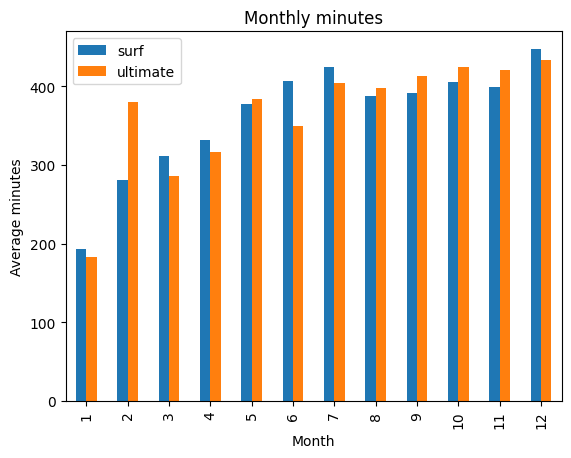

In [275]:
surf_monthly_minutes = surf_consumption.pivot_table(index = 'month', values = 'total_minutes')
ultimate_monthly_minutes = ultimate_consumption.pivot_table(index = 'month', values = 'total_minutes')

surf_monthly_minutes.merge(ultimate_monthly_minutes, left_index = True, right_index = True).plot(kind = 'bar',
                                                                                                 xlabel = 'Month',
                                                                                                 ylabel = 'Average minutes',
                                                                                                 title = 'Monthly minutes')
plt.legend(['surf', 'ultimate'])
plt.show()

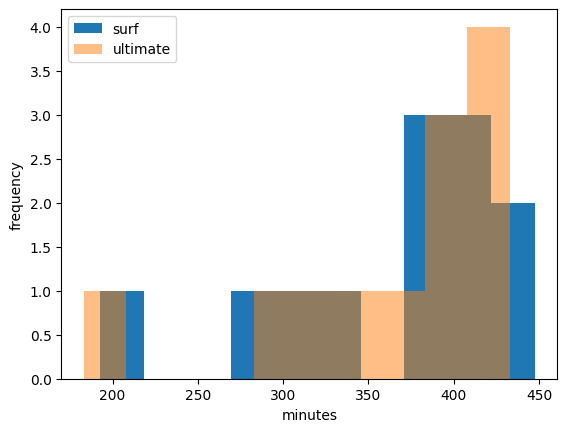

In [298]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
plt.hist(surf_monthly_minutes)
plt.hist(ultimate_monthly_minutes, alpha = 0.5)

plt.xlabel('minutes')
plt.ylabel('frequency')
plt.legend(['surf', 'ultimate'])


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [307]:
# Calcula la media y la varianza de la duración mensual de llamadas.
print('Media plan surf:', surf_monthly_minutes.mean())
print('Varianza plan surf', surf_monthly_minutes.var())
print()
print('Media plan ultimate:', ultimate_monthly_minutes.mean())
print('Varianza plan ultimate', ultimate_monthly_minutes.var())


Media plan surf: total_minutes    363.062967
dtype: float64
Varianza plan surf total_minutes    5177.321155
dtype: float64

Media plan ultimate: total_minutes    365.974762
dtype: float64
Varianza plan ultimate total_minutes    5335.727136
dtype: float64


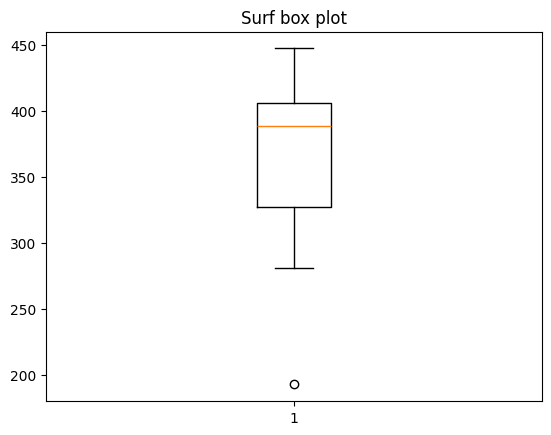

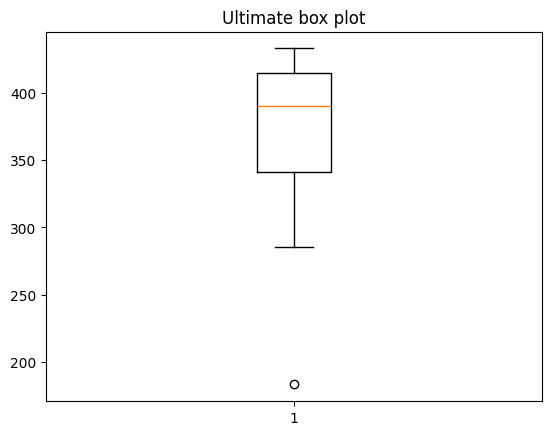

In [309]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.boxplot(surf_monthly_minutes)
plt.title('Surf box plot')
plt.show()

plt.boxplot(ultimate_monthly_minutes)
plt.title('Ultimate box plot')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

- Basándonos en las gráficas, el comportamiento de los usuarios con respecto a las llamadas es muy parecido. La media y varianza de llamadas en ambos planes es muy parecida.

### Mensajes

<Axes: xlabel='month'>

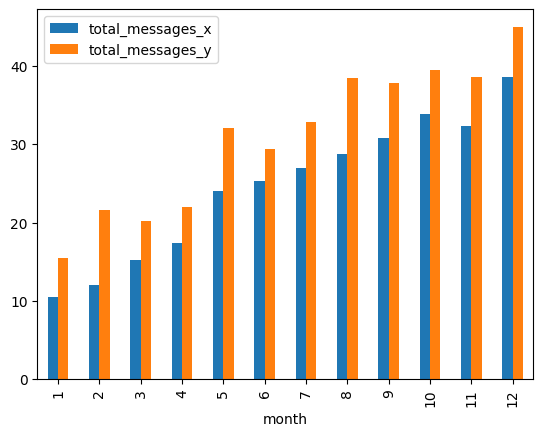

In [314]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
surf_monthly_messages = surf_consumption.pivot_table(index = 'month', values = 'total_messages')
ultimate_monthly_messages = ultimate_consumption.pivot_table(index = 'month', values = 'total_messages')

surf_monthly_messages.merge(ultimate_monthly_messages, left_index = True, right_index = True).plot(kind = 'bar')

In [316]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
print('Media plan surf:', surf_monthly_messages.mean())
print('Varianza plan surf', surf_monthly_messages.var())
print()
print('Media plan ultimate:', ultimate_monthly_messages.mean())
print('Varianza plan ultimate', ultimate_monthly_messages.var())


Media plan surf: total_messages    24.656
dtype: float64
Varianza plan surf total_messages    81.888846
dtype: float64

Media plan ultimate: total_messages    31.089497
dtype: float64
Varianza plan ultimate total_messages    87.353963
dtype: float64


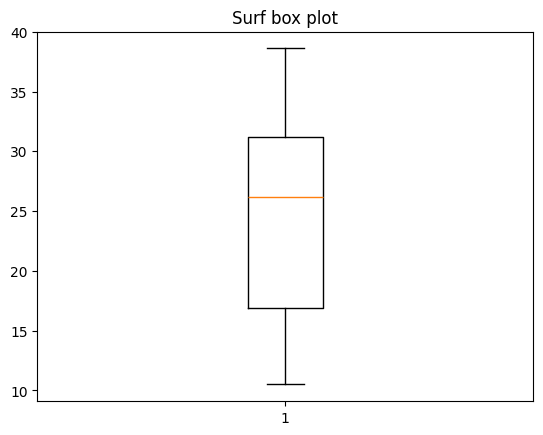

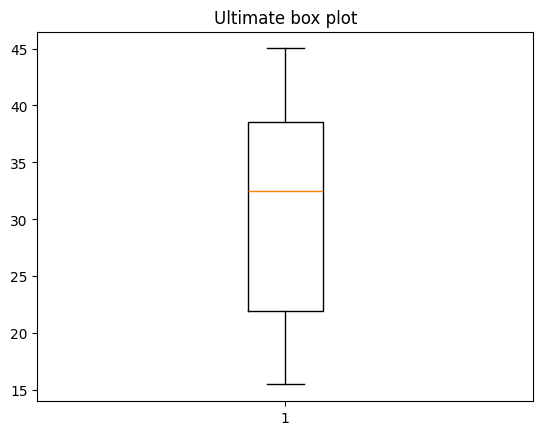

In [317]:
plt.boxplot(surf_monthly_messages)
plt.title('Surf box plot')
plt.show()

plt.boxplot(ultimate_monthly_messages)
plt.title('Ultimate box plot')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

- El plan ultimate tiene una mayor media y mayor varianza con respecto a los mensajes que el plan surf.

### Internet

<Axes: xlabel='month'>

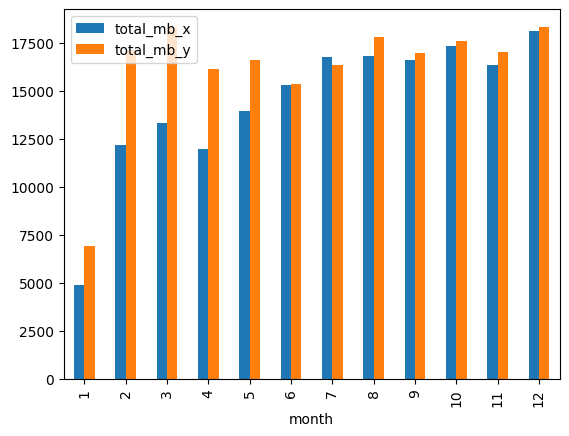

In [319]:
surf_monthly_mb = surf_consumption.pivot_table(index = 'month', values = 'total_mb')
ultimate_monthly_mb = ultimate_consumption.pivot_table(index = 'month', values = 'total_mb')

surf_monthly_mb.merge(ultimate_monthly_mb, left_index = True, right_index = True).plot(kind = 'bar')

In [328]:
print('Media plan surf:', surf_monthly_mb.mean())
print('Varianza plan surf', surf_monthly_mb.var())
print('Deviacion estandar plan surf', surf_monthly_mb.std())
print()
print('Media plan ultimate:', ultimate_monthly_mb.mean())
print('Varianza plan ultimate', ultimate_monthly_mb.var())
print('Deviacion estandar plan ultimate', ultimate_monthly_mb.std())

Media plan surf: total_mb    14464.554377
dtype: float64
Varianza plan surf total_mb    1.327065e+07
dtype: float64
Deviacion estandar plan surf total_mb    3642.89043
dtype: float64

Media plan ultimate: total_mb    16212.603528
dtype: float64
Varianza plan ultimate total_mb    9.351289e+06
dtype: float64
Deviacion estandar plan ultimate total_mb    3057.987791
dtype: float64


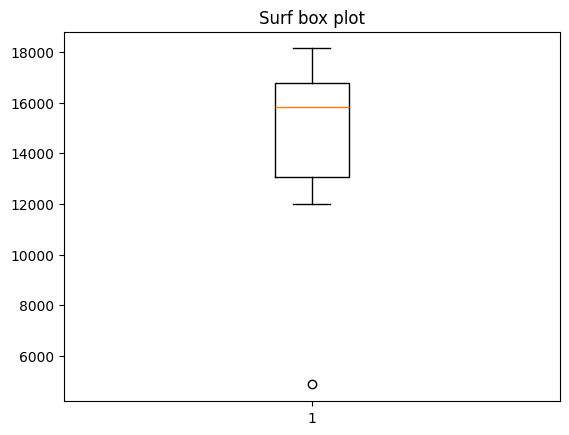

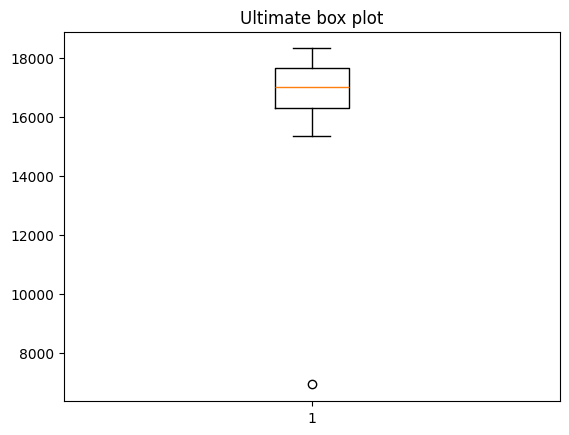

In [321]:
plt.boxplot(surf_monthly_mb)
plt.title('Surf box plot')
plt.show()

plt.boxplot(ultimate_monthly_mb)
plt.title('Ultimate box plot')
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

- Con respecto al consumo de internet, el comportamiento de los usuarios es muy parecido entre planes. La media de llamadas es mayor en el plan ultimate pero el plan surf tiene mayor variablidad. Ambos planes tienen valores atípicos.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

<Axes: xlabel='month'>

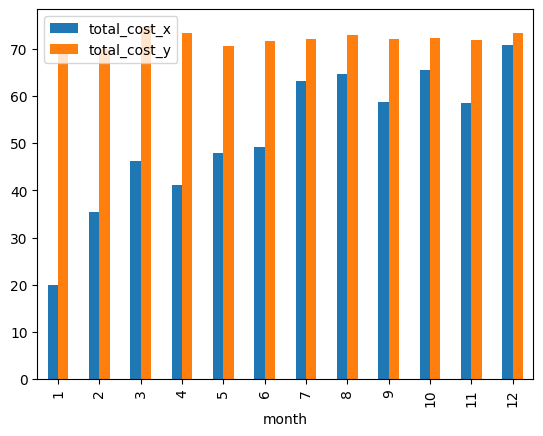

In [330]:
surf_monthly_income = surf_consumption.pivot_table(index = 'month', values = 'total_cost')
ultimate_monthly_income = ultimate_consumption.pivot_table(index = 'month', values = 'total_cost')

surf_monthly_income.merge(ultimate_monthly_income, left_index = True, right_index = True).plot(kind = 'bar')

In [331]:
print('Media plan surf:', surf_monthly_income.mean())
print('Varianza plan surf', surf_monthly_income.var())
print('Deviacion estandar plan surf', surf_monthly_income.std())
print()
print('Media plan ultimate:', ultimate_monthly_income.mean())
print('Varianza plan ultimate', ultimate_monthly_income.var())
print('Deviacion estandar plan ultimate', ultimate_monthly_income.std())

Media plan surf: total_cost    51.759539
dtype: float64
Varianza plan surf total_cost    216.945663
dtype: float64
Deviacion estandar plan surf total_cost    14.729075
dtype: float64

Media plan ultimate: total_cost    72.069509
dtype: float64
Varianza plan ultimate total_cost    1.955015
dtype: float64
Deviacion estandar plan ultimate total_cost    1.398218
dtype: float64


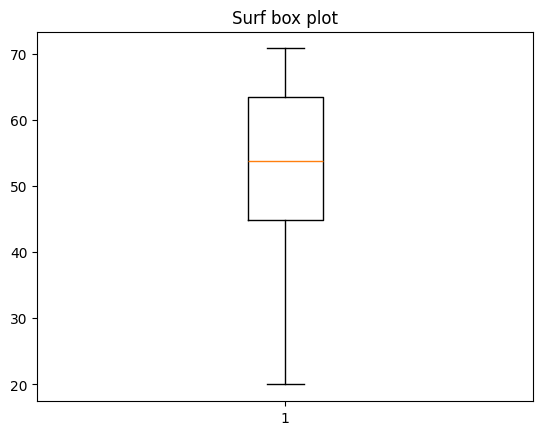

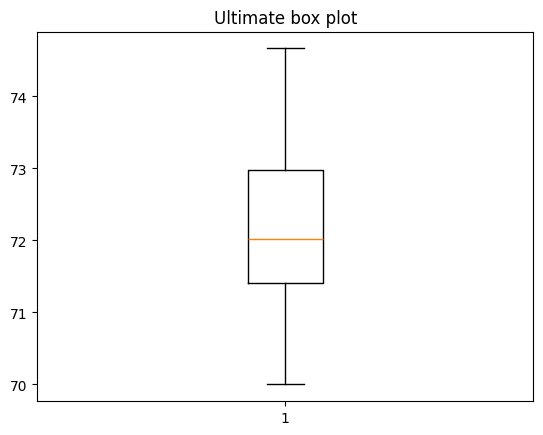

In [332]:
plt.boxplot(surf_monthly_income)
plt.title('Surf box plot')
plt.show()

plt.boxplot(ultimate_monthly_income)
plt.title('Ultimate box plot')
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

- La media de los ingresos por mes en el plan ultimate es mayor ($72) y, dado a que la variabilidad es menor, se mantiene así. En cambio, el plan surf el ingreso va incrementando poco a poco.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [ ]:
# Prueba las hipótesis

###  Hipotesis nula: las 2 medias son iguales, los ingresos promedios son iguales
### Hipotesis alternativa: las 2 medias son diferentes, los ingresos promedios son diferentes

#Nivel de confianza: 95%
alpha =0.05

results = st.ttest_ind(surf_monthly_income, ultimate_monthly_income)

print(results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza hipotesis nula")
else:
    print("No se rechaza la hipotesis nula")

[9.5442784e-05]
Se rechaza hipotesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [381]:
ny_nj_stats = user_consumption[user_consumption['city'].str.contains('NY-NJ')]
ny_nj_monthly_income = ny_nj_stats.pivot_table(index = 'month', values = 'total_cost')

non_ny_nj_stats = user_consumption[~user_consumption['city'].str.contains('NY-NJ')]
non_ny_nj_monthly_income = non_ny_nj_stats.pivot_table(index = 'month', values = 'total_cost')


In [380]:
# Prueba las hipótesis

###  Hipotesis nula: las 2 medias son iguales, los ingresos promedios de los usuarios del area NY-NJ es igual a los de otras regiones
### Hipotesis alternativa: las 2 medias son diferentes, los ingresos promedios de los usuarios del area NY-NJ es diferente a los de otras regiones

#Nivel de confianza: 95%
alpha =0.05

results = st.ttest_ind(ny_nj_monthly_income, non_ny_nj_monthly_income)

print(results.pvalue)

if results.pvalue < alpha:
    print("Se rechaza hipotesis nula")
else:
    print("No se rechaza la hipotesis nula")


[0.07234824]
No se rechaza la hipotesis nula


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

- Es importante entender el negocio y los problemas que buscan resolver.
- Igualmente es vital entender la información inicial que se nos presenta: qué nos dice cada tabla, qué información relevante podemos sacar de ellas.  
- Es necesario realizar limpieza y preprocesamiento de datos como eliminación de inconsistencias y valores ausentes antes de poder trabajar con ellos.
- Durante el proceso de procesamiento y análisis, se crean nuevas tablas a partir de otras tablas.
- Utilizar gráficas para un mejor entendimiento visual.
- Usar métodos estadísticos para sustentar nuestras conclusiones.
- Es un proceso iterativo que puede llevar a modificar los datos que ya se habían procesado.
